In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as kMeans

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.cluster import KMeans


n_clusters = 6

kmeans = KMeans(n_clusters = n_clusters)
X["cluster1"] = kmeans.fit_predict(X_scaled)
X["cluster1"] = X["cluster1"].astype("category")
X.head()

X["cluster2"] = kmeans.fit_predict(X)
X["cluster2"] = X["cluster2"].astype("category")
X

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,median_income,latitude,longitude,cluster1,cluster2
0,8.3252,37.88,-122.23,0,0
1,8.3014,37.86,-122.22,0,0
2,7.2574,37.85,-122.24,0,0
3,5.6431,37.85,-122.25,0,0
4,3.8462,37.85,-122.25,3,2
...,...,...,...,...,...
20635,1.5603,39.48,-121.09,3,2
20636,2.5568,39.49,-121.21,3,2
20637,1.7000,39.43,-121.22,3,2
20638,1.8672,39.43,-121.32,3,2


<Axes: xlabel='longitude', ylabel='latitude'>

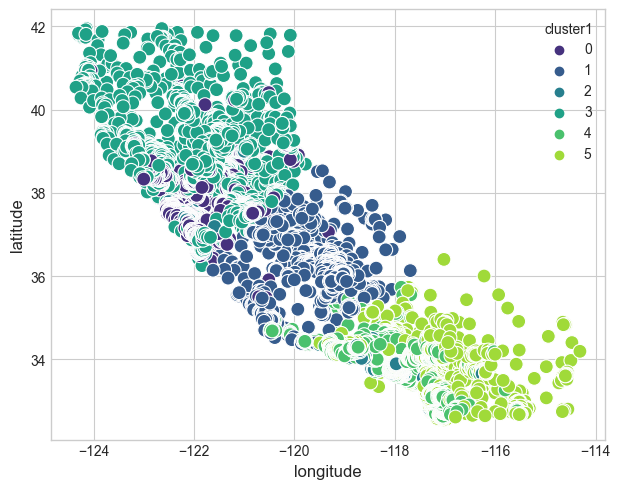

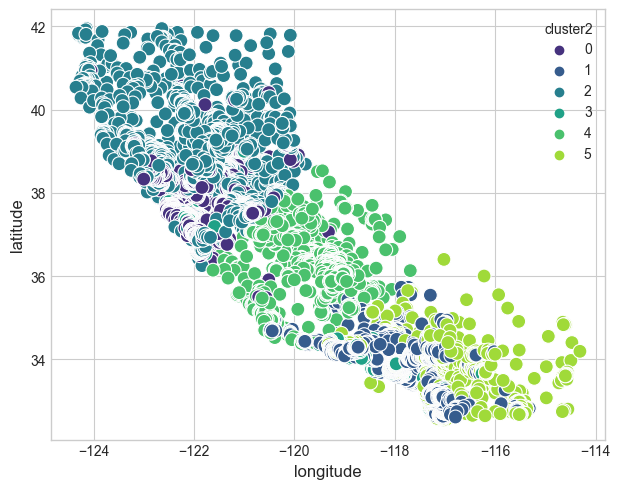

In [59]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='longitude', y='latitude', hue='cluster1', data=X, palette='viridis', s=100, legend='full')

plt.figure(figsize=(12, 5))
plt.subplot(1,2,2)
sns.scatterplot(x='longitude', y='latitude', hue='cluster2', data=X, palette='viridis', s=100, legend='full')
